In [ ]:
!pip install kagglehub

In [12]:
import kagglehub
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [13]:
# Download latest version
path = kagglehub.dataset_download("orvile/x-ray-baggage-anomaly-detection")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'x-ray-baggage-anomaly-detection' dataset.
Path to dataset files: /kaggle/input/x-ray-baggage-anomaly-detection


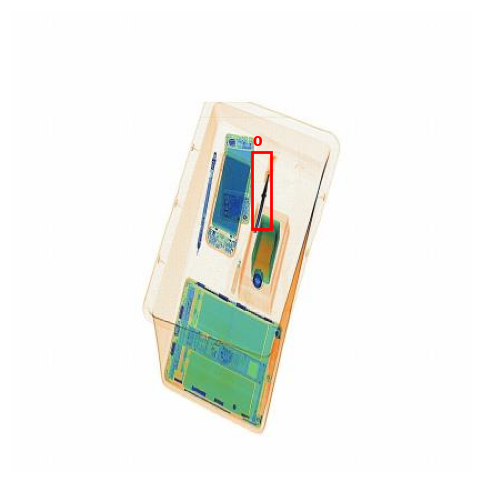

In [14]:
# Definir paths (ajustar a tu ruta base)
base_path = path  # donde kagglehub descargó
images_path = os.path.join(base_path, "train", "images")
labels_path = os.path.join(base_path, "train", "labels")

# Cargar clases desde data.yaml (si querés tener nombres)
import yaml
with open(os.path.join(base_path, "data.yaml"), "r") as f:
    classes = yaml.safe_load(f)["names"]

# Elegir imagen al azar
img_file = random.choice(os.listdir(images_path))
img_path = os.path.join(images_path, img_file)
label_path = os.path.join(labels_path, img_file.replace(".jpg", ".txt"))

# Abrir imagen
img = Image.open(img_path).convert("RGB")
w, h = img.size

# Dibujar imagen
fig, ax = plt.subplots(1, figsize=(6,6))
ax.imshow(img)

# Cargar labels YOLO (clase x_center y_center width height)
if os.path.exists(label_path):
    with open(label_path, "r") as f:
        for line in f.readlines():
            cls, x, y, bw, bh = map(float, line.strip().split())
            cls = int(cls)

            # convertir coordenadas YOLO a pixeles
            x_center, y_center = x * w, y * h
            bw, bh = bw * w, bh * h
            x1 = x_center - bw/2
            y1 = y_center - bh/2

            # dibujar rectángulo
            rect = patches.Rectangle((x1, y1), bw, bh, linewidth=2,
                                     edgecolor="red", facecolor="none")
            ax.add_patch(rect)
            ax.text(x1, y1-5, classes[cls], color="red", fontsize=10, weight="bold")

plt.axis("off")
plt.show()